# The Case of the Elusive Suspect: A Data Scientist's Forensic Handbook

Every crime leaves a trail, a series of digital breadcrumbs that only a keen eye—and powerful data tools—can decipher.

Our mission: to sift through human behaviors and uncover the tell-tale signs that mark individuals as **suspects**, distinguishing them from the **innocent** or confirming their **guilt**.

This isn't just about numbers; it's about justice.

---
<br><br>

## The Detective's Toolkit: Preparing for the Investigation

Before we even look at a single suspect profile, a seasoned detective knows the importance of preparing their tools and understanding their methodology. This is where our 'toolkit' comes into play, ensuring our investigation is thorough, fair, and reliable.

Think of our main body of evidence, say `Train_case_files.csv`. We can't just throw all of it at our analytical 'brain' at once. We strategically divide it into three crucial piles:

* **Training Set (The Detective's Academy):** This is the biggest pile of our known case files. Our detective-in-training will meticulously study every detail here – every behavior, every nuance of past suspects. It's where our analytical brain learns to recognize the patterns of guilt and innocence, building its core knowledge base.

* **Validation Set (The Practice Drills):** This is a smaller, secret stash of cases that our detective *hasn't* seen during their formal 'Academy' training. We use this pile for regular practice drills and fine-tuning. Imagine giving our detective a pop quiz. If they struggle here, we adjust their training methods. We often set aside about **20%** of our `Train_case_files.csv` for this (an **80/20 split**). This is super important, especially if we don't have millions of cases. Why? To prevent **overtraining**. An overtrained detective is like someone who's only memorized a textbook – they're brilliant on the specific questions they've seen, but totally lost when a new, slightly different case comes along. The validation set ensures our detective learns to generalize, not just memorize, making them truly smart, not just parrots.

* **Testing Set (The Grand Jury Trial):** This is our most precious, untouched pile of evidence, perhaps `New_suspects.csv`. Our detective will *never* see this data during training or practice. This is the ultimate, real-world test. Once our detective is fully trained and validated, we present these truly unknown cases to see how well they perform. This gives us an honest, unbiased verdict on their ability to solve new mysteries.


In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_train = pd.read_csv('./Suspects/Train_case_files.csv')
train_df, val_df = train_test_split(df_train, test_size=0.2, random_state=42, shuffle=True)

train_df.to_csv('Train_case_files80.csv', index=False)
val_df.to_csv('Validation_case_files20.csv', index=False)

print(f"Training set: {len(train_df)} rows ({len(train_df)/len(df_train)*100:.2f}%)")
print(f"Validation set: {len(val_df)} rows ({len(val_df)/len(df_train)*100:.2f}%)")


Training set: 318 rows (79.90%)
Validation set: 80 rows (20.10%)


---
<br><br>


## The Case Files: Gathering Our Evidence

With our methodology clear, let's officially open the case. Our investigation begins by gathering the initial evidence: `Train_case_files.csv` and `Test_new_suspects.csv`. These are our raw intelligence reports.

The `Train_case_files.csv` holds profiles of individuals whose innocence or guilt is already known – our baseline for learning. The `Test_new_suspects.csv` contains profiles of individuals whose status is yet to be determined, awaiting our expert analysis.

Let's quickly review the structure of these initial case files.

In [179]:
import pandas as pd

df_train = pd.read_csv('./Suspects/Train_case_files.csv')
df_test = pd.read_csv('./Suspects/New_suspects.csv')

print(df_train)
print()
print(df_test)

     Emotional Volatility  Deception Quotient  Physical Strength  \
0                  11.800               17.26              75.26   
1                  19.810               22.15             130.00   
2                  10.970               17.20              71.73   
3                  11.620               18.18              76.38   
4                  11.260               19.83              71.30   
..                    ...                 ...                ...   
393                 8.618               11.79              54.34   
394                13.530               10.94              87.91   
395                11.640               18.33              75.17   
396                 9.876               19.40              63.95   
397                19.550               28.77             133.60   

     Authority Resistance  Athleticism  Sleight of Hand  Hypervigilance  \
0                   431.9      0.09087          0.06232        0.028530   
1                  1260.0      0.

---
<br><br>

## Unveiling the Attributes: What Defines a Suspect?

Our first deep dive involves examining the individual 'characteristics' or 'attributes' recorded for each person.

These are the clues in their profile, like a forensic psychologist's observations.

We plot each attribute to see how it's distributed: first, overall for everyone, and then specifically comparing **'Guilty/Suspect' individuals (red)** versus **'Innocent' individuals (blue)**.

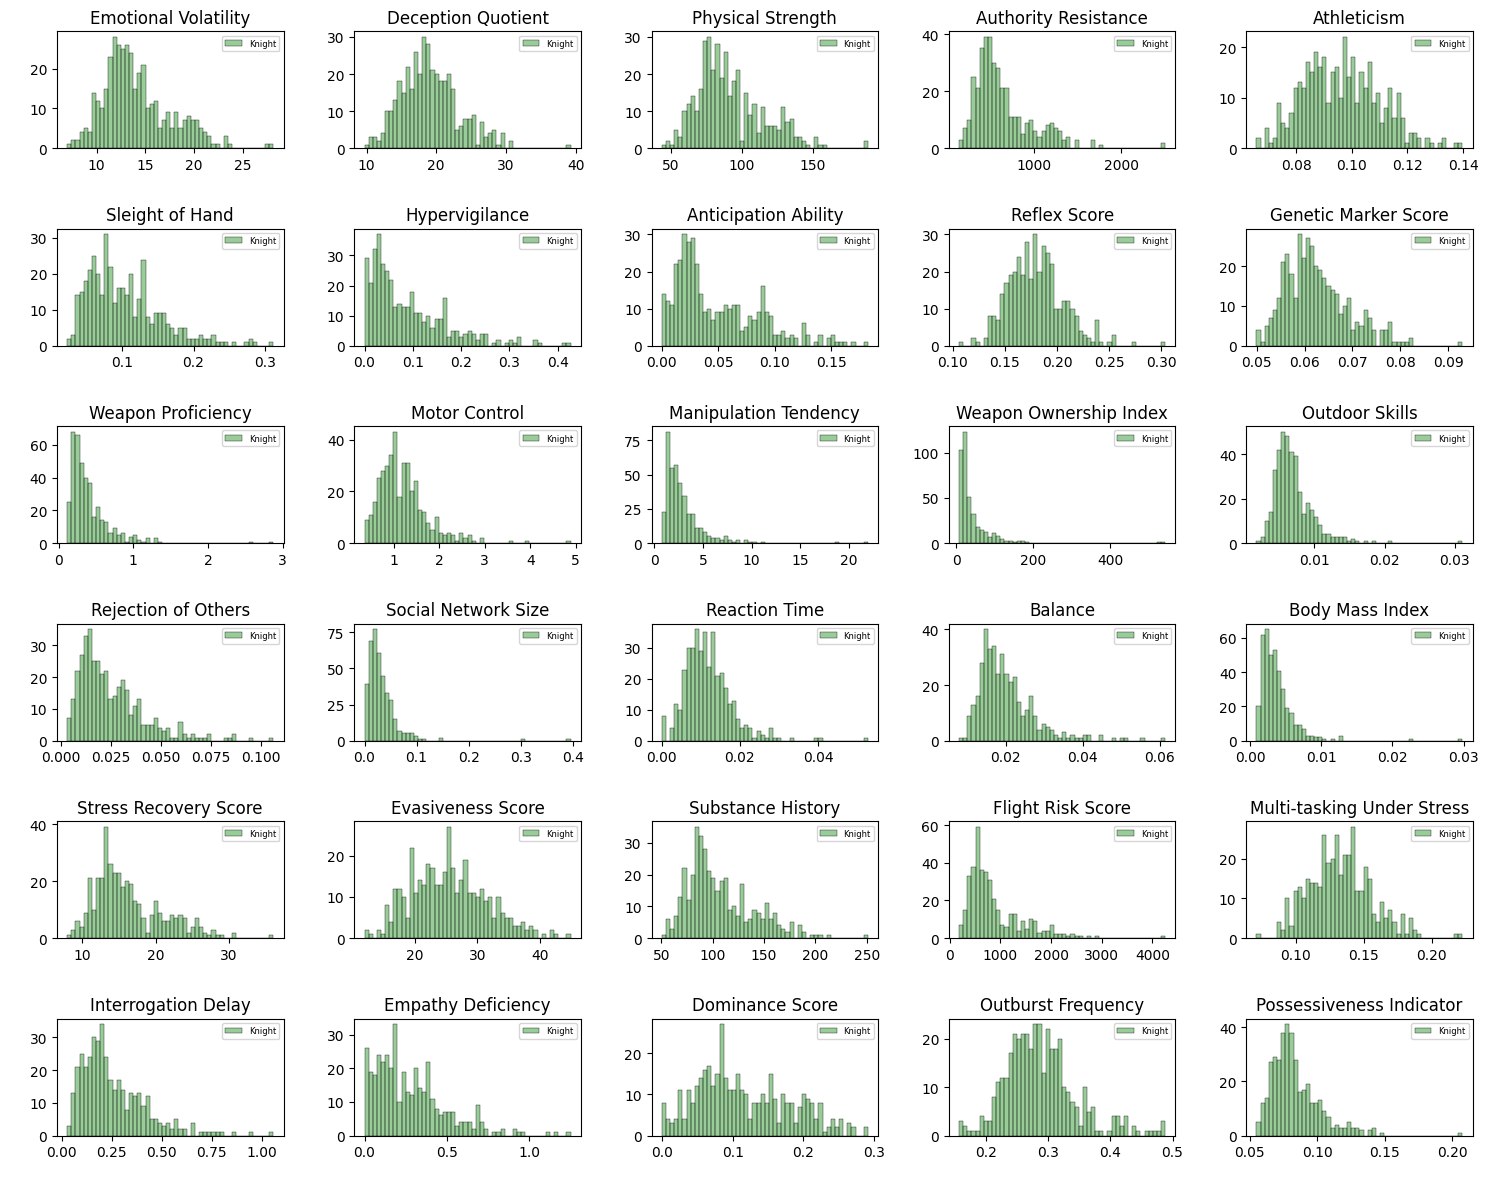

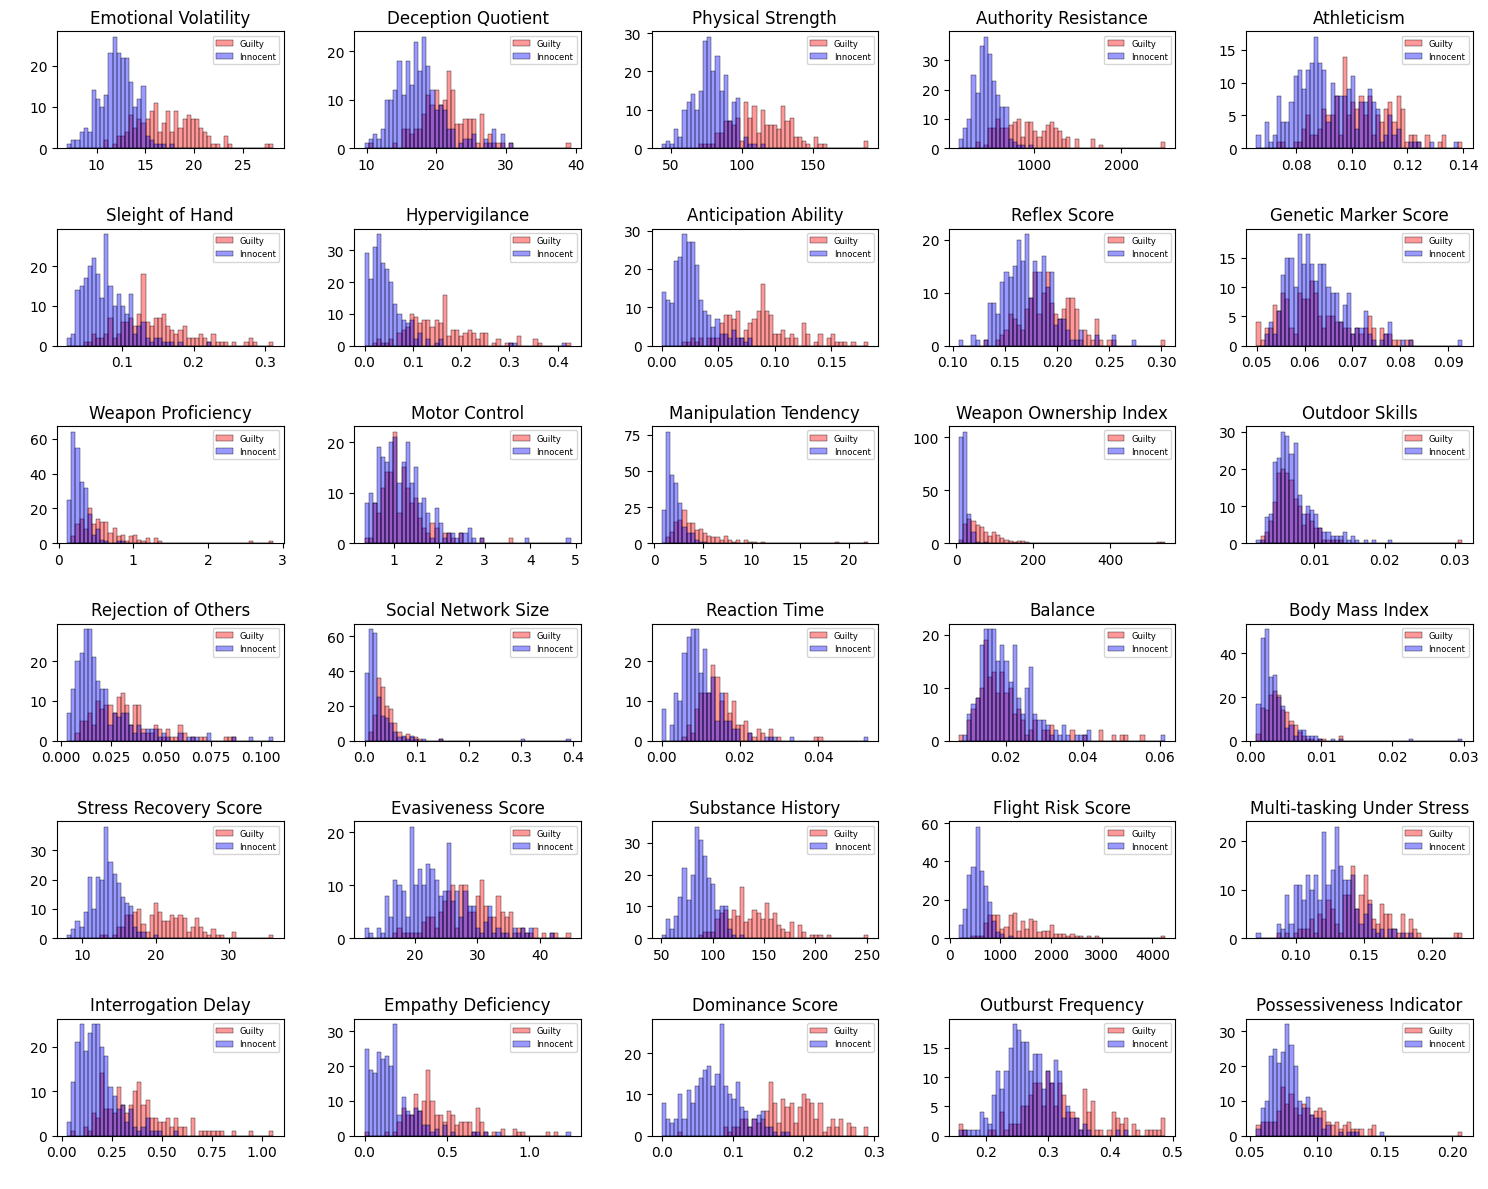

In [180]:

import matplotlib.pyplot as plt
import seaborn as sns


# Select only numeric columns
numeric_cols = df_train.select_dtypes(include='number').columns

# Set up the grid size
num_items = len(numeric_cols)
cols = 5
rows = (num_items + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 2 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df_train,
                 x=col,
                 bins=50,
                 ax=axes[i],
                 kde=False,
                 color='green',
                 alpha=0.4)   
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel(' ')
    axes[i].legend(['Knight'], loc='upper right', fontsize=6)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()




# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 2 * rows))
axes = axes.flatten()  # Flatten 2D array of axes to 1D for easy indexing

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df_train,
                 x=col,
                 bins=50,
                 ax=axes[i],
                 hue='suspect',
                 palette=['blue', 'red'],
                 kde=False,
                 alpha=0.4)   
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel(' ')
    axes[i].legend(['Guilty', 'Innocent'], loc='upper right', fontsize=6)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

By looking at these visual patterns, we can start to spot which clues truly differentiate a suspect from an innocent person, and which ones are just too mixed to be useful.

For example, attributes like "Body Mass Index," "Outdoor Skills," "Balance," "Motor Control," and "Genetic Marker Score" often show distributions that are heavily overlapped. It's like finding generic shoe prints at a crime scene – they don't tell us much about our specific culprit.

In contrast, other attributes show much clearer distinctions. These are the 'fingerprints' left behind.

### The Smoking Gun: Quantifying Attribute Correlation

A top detective doesn't just eyeball the evidence; they quantify it.

We calculate the **correlation** of each attribute with our ultimate target: being a 'suspect' (guilty or likely involved).

This tells us how strongly each piece of evidence is linked to their status.

After calculating these correlations, we meticulously **sort them by strength**, with the strongest links at the top. These top correlations are our **'smoking guns'** – the attributes that give us the clearest indication of guilt or innocence.

Here's what our analysis of your updated data reveals, showing the most significant correlations first:

In [181]:
# Convert suspect allegiance to a numerical clue (Guilty: 1, Innocent: 0).
df_train['suspect'] = df_train['suspect'].map({'guilty': 1, 'innocent': 0})

# Identify all numerical attribute columns.
numeric_cols = df_train.select_dtypes(include='number').columns

# Calculate correlation of each attribute with suspect allegiance.
correlations = df_train[numeric_cols].corrwith(df_train['suspect'])

# Sort
correlations_sorted = correlations.abs().sort_values(ascending=False)

# Convert sorted correlations into a neat DataFrame report.
corr_df_train = correlations_sorted.to_frame(name='correlation')

# Rename the column
corr_df_train = corr_df_train.reset_index().rename(columns={'index': 'column'})

# Round correlation values
corr_df_train['correlation'] = corr_df_train['correlation'].round(6)

# Display the report
print(corr_df_train.to_string(index=False))

df_train['suspect'] = df_train['suspect'].map({1 : 'guilty', 0 : 'innocent'})

                    column  correlation
                   suspect     1.000000
           Dominance Score     0.793652
      Anticipation Ability     0.790066
         Substance History     0.786797
     Stress Recovery Score     0.777633
         Flight Risk Score     0.739672
         Physical Strength     0.737403
      Emotional Volatility     0.721566
      Authority Resistance     0.700709
            Hypervigilance     0.699662
        Empathy Deficiency     0.648893
           Sleight of Hand     0.631987
       Interrogation Delay     0.598072
        Weapon Proficiency     0.550663
     Manipulation Tendency     0.537800
    Weapon Ownership Index     0.515340
         Evasiveness Score     0.465605
        Deception Quotient     0.446632
        Outburst Frequency     0.445847
Multi-tasking Under Stress     0.445223
             Reaction Time     0.421950
               Athleticism     0.397458
              Reflex Score     0.375103
  Possessiveness Indicator     0.350105


---
<br><br>

## Visualizing the Connections: A Forensic Map

To make these connections even clearer, we create forensic maps (scatterplots).

For attributes like "Dominance Score" and "Anticipation Ability," we expect to see distinct clusters for suspects versus innocent individuals.

In contrast, plots for "Body Mass Index" or "Outdoor Skills" would show heavily mixed distributions, confirming their low correlation and limited investigative value.

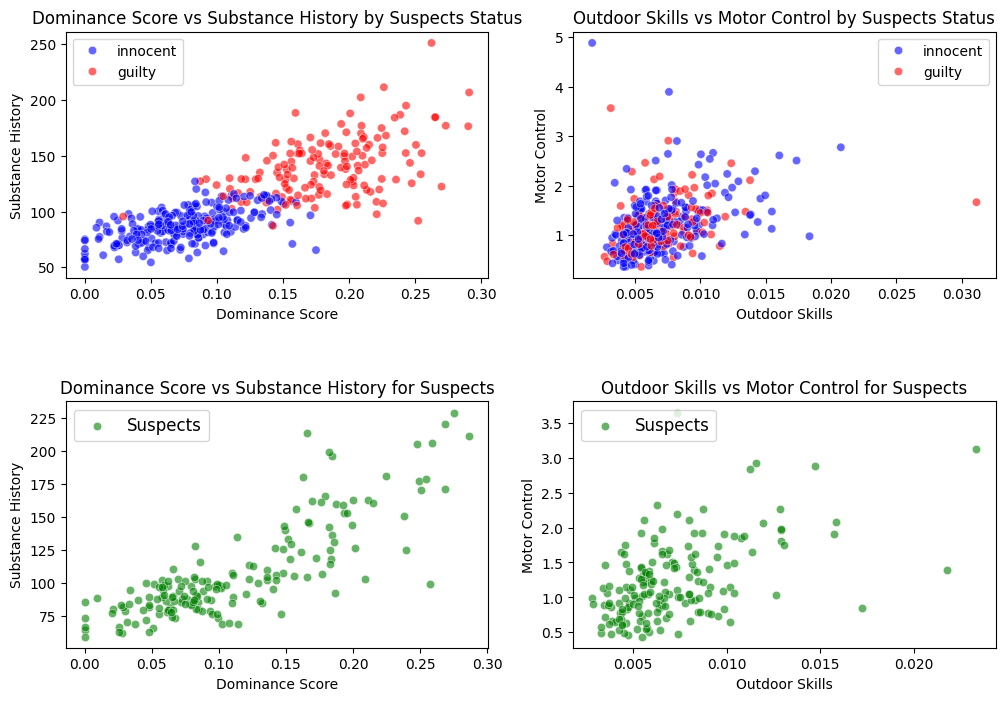

In [182]:

plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,2,1)
sns.scatterplot(data=df_train, x='Dominance Score', y='Substance History', hue='suspect', alpha=0.6, palette={'red', 'blue'})
plt.legend()
plt.title("Dominance Score vs Substance History by Suspects Status")

plt.subplot(2,2,2)
sns.scatterplot(data=df_train, x='Outdoor Skills', y='Motor Control', hue='suspect', alpha=0.6, palette={'red', 'blue'})
plt.legend()
plt.title("Outdoor Skills vs Motor Control by Suspects Status")


plt.subplot(2,2,3)
sns.scatterplot(data=df_test, x='Dominance Score', y='Substance History', alpha=0.6, color='green')
plt.legend(['Suspects'], loc='upper left', fontsize=12)
plt.title("Dominance Score vs Substance History for Suspects")

plt.subplot(2,2,4)
sns.scatterplot(data=df_test, x='Outdoor Skills', y='Motor Control', alpha=0.6, color='green')
plt.legend(['Suspects'], loc='upper left', fontsize=12)
plt.title("Outdoor Skills vs Motor Control for Suspects")
plt.show()



### Verifying Our Findings: Insights from the Testing Data

After identifying strong leads from our training data, a good detective always verifies.

The two plots at the bottom, displayed in a sole green color, represent data from the testing case files, 'New_suspects.csv'.

By looking at these correlations in unseen profiles, we ensure our findings aren't just quirks of our initial evidence, but truly generalizable traits that can identify suspects in new cases.

---
<br><br>

## Preparing Our Evidence: Standardization vs. Normalization

Before we proceed with advanced analytical techniques, our evidence must be prepared uniformly.

### Standardization: Leveling the Playing Field



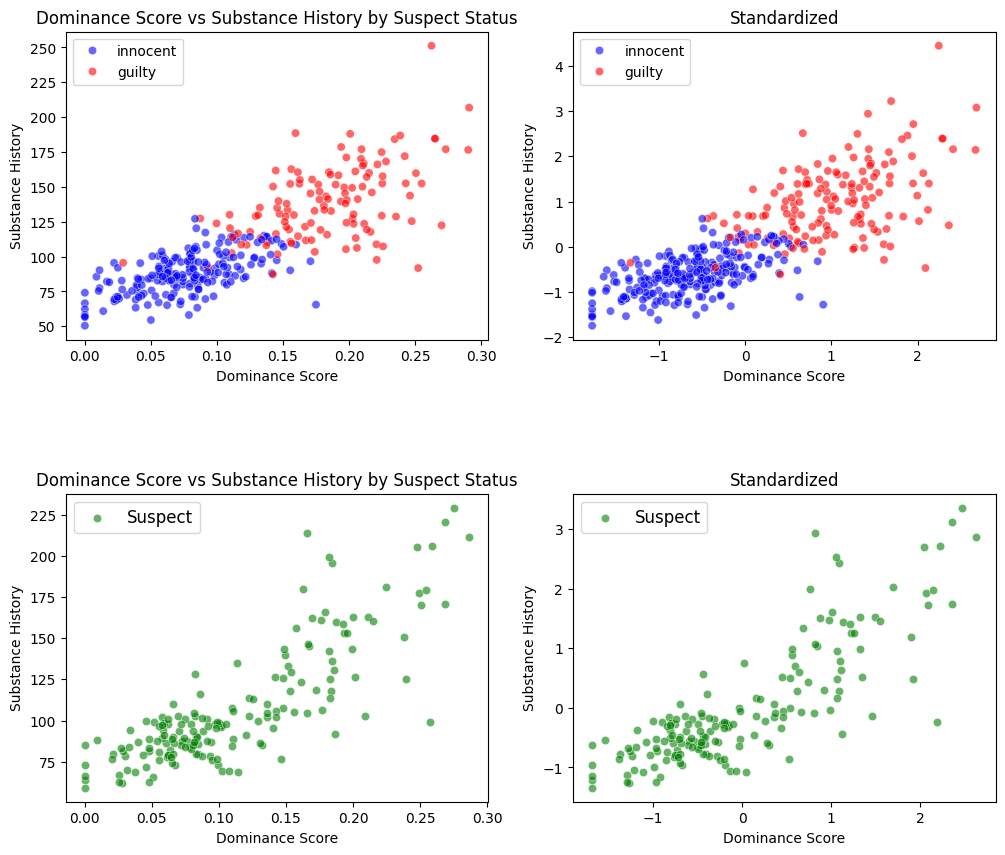

In [183]:
from sklearn.preprocessing import StandardScaler


numeric_cols_train = df_train.select_dtypes(include='number').columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_train[numeric_cols_train])
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols_train)
X_scaled_df['suspect'] = df_train['suspect'].values

plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 2, 2)
sns.scatterplot(data=X_scaled_df, x='Dominance Score', y='Substance History', hue='suspect', alpha=0.6, palette=['blue', 'red'])
plt.legend()
plt.title("Standardized")


numeric_cols_test = df_test.select_dtypes(include='number').columns
X_scaled = scaler.fit_transform(df_test[numeric_cols_test].fillna(0))
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols_test)

plt.subplot(2, 2, 4)
sns.scatterplot(data=X_scaled_df, x='Dominance Score', y='Substance History', alpha=0.6, color='green')
plt.legend(['Suspect'], loc='upper left', fontsize=12)
plt.title("Standardized")



plt.subplot(2, 2, 1)
sns.scatterplot(data=train_df, x='Dominance Score', y='Substance History', hue='suspect', alpha=0.6, palette=['blue', 'red'])
plt.legend()
plt.title("Dominance Score vs Substance History by Suspect Status")

plt.subplot(2, 2, 3)
sns.scatterplot(data=df_test, x='Dominance Score', y='Substance History', alpha=0.6, color='green')
plt.legend(['Suspect'], loc='upper left', fontsize=12)
plt.title("Dominance Score vs Substance History by Suspect Status")
plt.show()

Evidence comes in varied scales.

Standardization transforms attributes so they have a mean of 0 and a standard deviation of 1. 

This is like putting all our clues into a standard measuring cup.

If you then plot these, you'd typically see values ranging consistently from about -2 to 3 on both axes.

This ensures every clue is weighted fairly, preventing larger numbers from unfairly dominating our forensic tools.
<br>

### Normalization: Fitting to a Blueprint


Text(0.5, 1.0, 'Outdoor Skills vs Motor Control by Suspect Status')

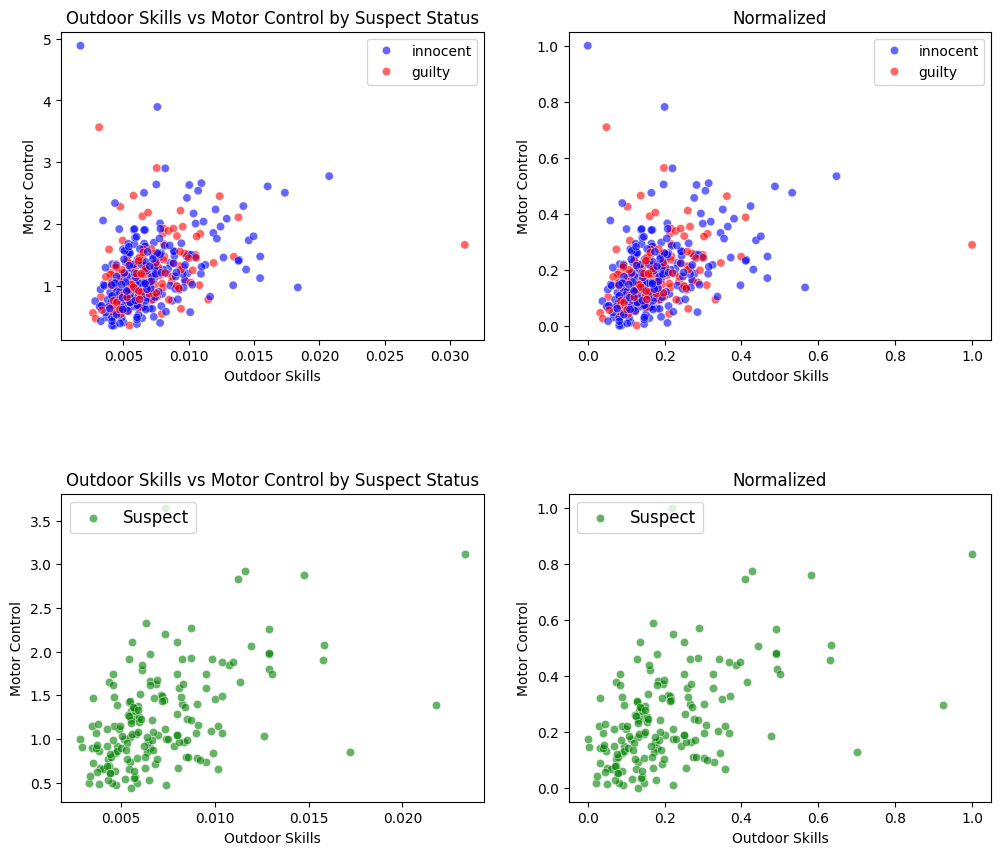

In [184]:
from sklearn.preprocessing import MinMaxScaler


numeric_cols_train = df_train.select_dtypes(include='number').columns

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_train[numeric_cols_train])
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols_train)
X_scaled_df['suspect'] = df_train['suspect'].values

plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 2, 2)
sns.scatterplot(data=X_scaled_df, x='Outdoor Skills', y='Motor Control', hue='suspect', alpha=0.6, palette=['blue', 'red'])
plt.legend()
plt.title("Normalized")


numeric_cols_test = df_test.select_dtypes(include='number').columns
X_scaled = scaler.fit_transform(df_test[numeric_cols_test].fillna(0))
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols_test)

plt.subplot(2, 2, 4)
sns.scatterplot(data=X_scaled_df, x='Outdoor Skills', y='Motor Control', alpha=0.6, color='green')
plt.legend(['Suspect'], loc='upper left', fontsize=12)
plt.title("Normalized")



plt.subplot(2, 2, 1)
sns.scatterplot(data=df_train, x='Outdoor Skills', y='Motor Control', hue='suspect', alpha=0.6, palette=['blue', 'red'])
plt.legend()
plt.title("Outdoor Skills vs Motor Control by Suspect Status")

plt.subplot(2, 2, 3)
sns.scatterplot(data=df_test, x='Outdoor Skills', y='Motor Control', alpha=0.6, color='green')
plt.legend(['Suspect'], loc='upper left', fontsize=12)
plt.title("Outdoor Skills vs Motor Control by Suspect Status")

Normalization is another method, scaling attributes to a fixed range, typically 0 to 1.

This is like fitting every clue precisely into a predefined slot in our evidence locker.

This is vital for certain analytical tools that prefer inputs within strict boundaries, ensuring all evidence is presented in a consistent, controlled format for accurate analysis.

---
<br><br>

## Conclusion: The Pursuit of Truth and What Comes Next

Our initial forensic work—meticulously preparing evidence and identifying key clues—lays a strong foundation.

The immediate next phase of our investigation involves building and training our 'detective agents': sophisticated models designed to directly analyze these profiles.

In future reports, these agents will prove their capability to definitively tell a criminal from an innocent, advancing justice through data.